In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

plt.rcParams['figure.figsize'] = (20, 8)   
plt.rcParams['figure.dpi'] = 72             
plt.rcParams['font.size'] = 20              
plt.rcParams['text.usetex'] = False 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['SimHei','Arial']})
matplotlib.rcParams['font.sans-serif'] = ['SimHei','Arial']


color_palette = sns.color_palette(n_colors = 3)

PROJECTION_COL,DEATH_COL, INFECTION_COL   = color_palette

In [319]:
df = pd.read_csv('Corona - Sheet1.csv')
df = df.iloc[9:]

df.date = pd.to_datetime(df.date, dayfirst = True)
df_all = df[df.date <= pd.datetime.today()]

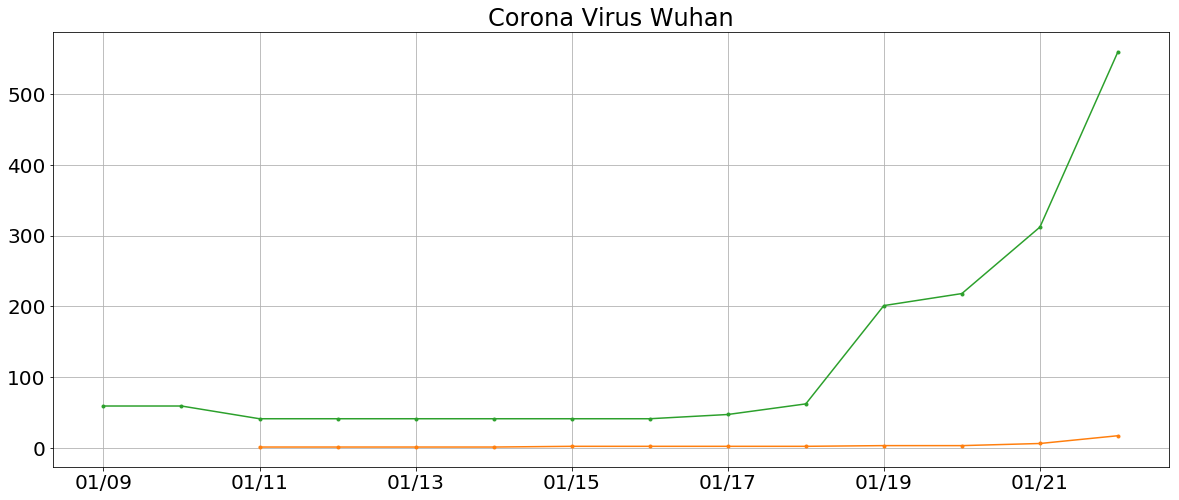

In [320]:
fig, ax = plt.subplots(1,1)
plt.plot(df_all.date, df_all.infections, marker='.', color=INFECTION_COL)
plt.plot(df_all.date, df_all.deaths, marker='.', color=DEATH_COL)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.title('Corona Virus Wuhan')
plt.grid()

In [323]:
df = df_all.iloc[7:]

y = df.infections
x = range(0,df.shape[0])
coeffs = np.polyfit(np.log(y), x, 1)

model = lambda x: coeffs[0]*x+coeffs[1]
model = lambda x: 50+np.e**x

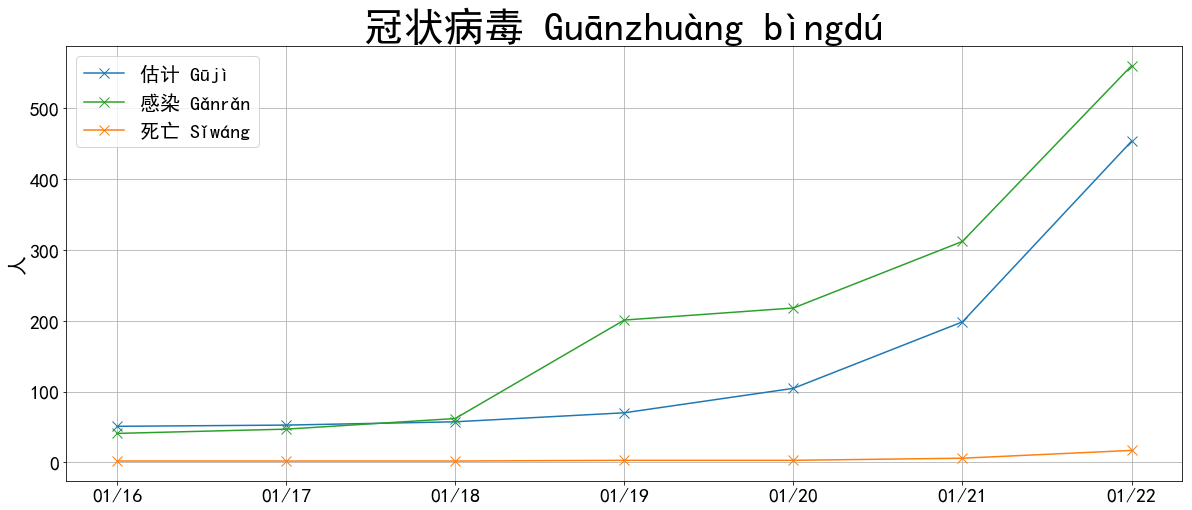

In [344]:
future_days = 0
X = pd.date_range(df.date.min(), df.date.max() + timedelta(future_days))
Y = [model(i) for i in range(X.shape[0])]

fig, ax = plt.subplots(1,1)
ax.plot(X, Y, marker='x', label = '估计 Gūjì', ms = 10, color=PROJECTION_COL)

ax.plot(df.date, df.infections, marker='x', ms = 10, color=INFECTION_COL, label='感染 Gǎnrǎn')
ax.plot(df.date, df.deaths, marker='x', ms = 10, color=DEATH_COL, label='死亡 Sǐwáng')
plt.title('冠状病毒 Guānzhuàng bìngdú', size = 40)
plt.ylabel('人')
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.grid()
plt.locator_params(nbins=10)
plt.legend()
plt.savefig('corona1.png')

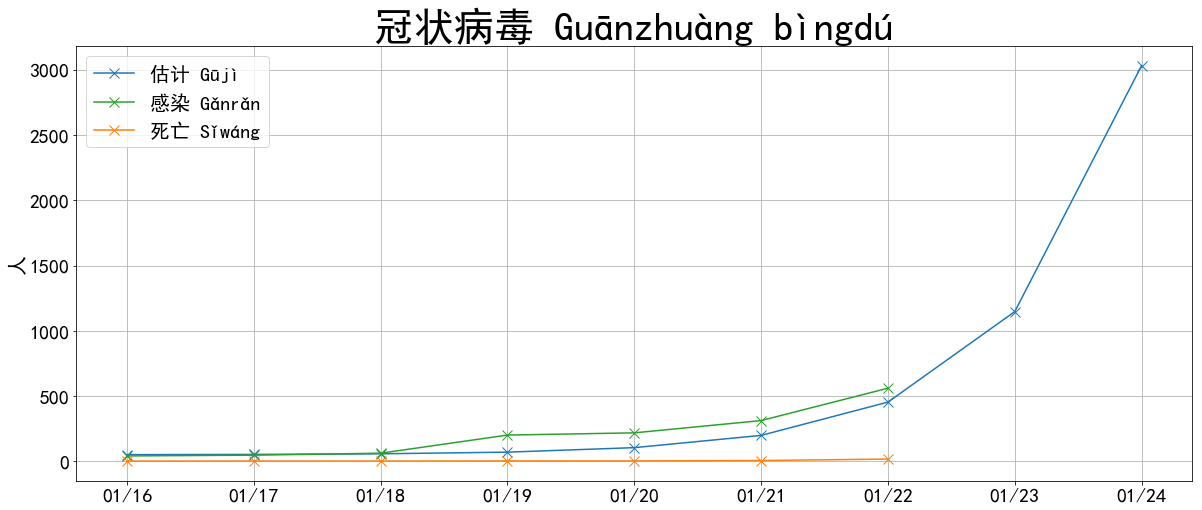

In [343]:
future_days = 2
X = pd.date_range(df.date.min(), df.date.max() + timedelta(future_days))
Y = [model(i) for i in range(X.shape[0])]

fig, ax = plt.subplots(1,1)
ax.plot(X, Y, marker='x', label = '估计 Gūjì', ms = 10)

ax.plot(df.date, df.infections, marker='x', ms = 10, color=INFECTION_COL, label='感染 Gǎnrǎn')
ax.plot(df.date, df.deaths, marker='x', ms = 10, color=DEATH_COL, label='死亡 Sǐwáng')
plt.title('冠状病毒 Guānzhuàng bìngdú', size = 40)
plt.ylabel('人')
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.grid()
plt.locator_params(nbins=10)
plt.legend()
plt.savefig('corona2.png')